In [1]:
try:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt

    import time
    import warnings

    from sklearn.model_selection import train_test_split, RandomizedSearchCV
    from sklearn.preprocessing import StandardScaler, OneHotEncoder
    from sklearn.impute import SimpleImputer
    from sklearn.metrics import mean_squared_error, mean_absolute_error
    
    from sklearn.ensemble import (
        RandomForestRegressor, 
        GradientBoostingRegressor, 
        BaggingRegressor,
        VotingRegressor, 
        StackingRegressor
    )
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.linear_model import LinearRegression
    
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
    
    from scipy.stats import randint, uniform
except ImportError as e:
    !pip install -q numpy matplotlib opencv-python tensorflow scikit-learn seaborn
    print('Error, porfavor renicia el kernel y ejecuta esta celda nuevamente')

In [2]:
warnings.filterwarnings('ignore')

df = pd.read_csv('factory_sensors_draw2_clean.csv')

In [3]:
X = df.drop('quality_score', axis=1)
y = df['quality_score']
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.25, random_state=42
)

In [5]:
print(f"\n--- Tamaños de los sets ---")
print(f"Train: {X_train.shape[0]} muestras")
print(f"Validation: {X_val.shape[0]} muestras")
print(f"Test: {X_test.shape[0]} muestras")


--- Tamaños de los sets ---
Train: 3366 muestras
Validation: 1122 muestras
Test: 1122 muestras


---

In [6]:
categorical_columns = X_train.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
one_hot_en_train = encoder.fit_transform(X_train[categorical_columns])
one_hot_en_test = encoder.transform(X_test[categorical_columns])

one_hot_df_train = pd.DataFrame(one_hot_en_train,
                                columns=encoder.get_feature_names_out(categorical_columns), 
                                index=X_train.index)

one_hot_df_test = pd.DataFrame(one_hot_en_test, 
                               columns=encoder.get_feature_names_out(categorical_columns), 
                               index=X_test.index)

one_hot_df_val = pd.DataFrame(one_hot_en_test, 
                               columns=encoder.get_feature_names_out(categorical_columns), 
                               index=X_val.index)

X_train_v2 = pd.concat([X_train, one_hot_df_train], axis=1)
X_test_v2 = pd.concat([X_test, one_hot_df_test], axis=1)
X_val_v2  = pd.concat([X_val, one_hot_df_val], axis=1)

X_train_v2 = X_train_v2.drop(categorical_columns, axis=1)
X_test_v2 = X_test_v2.drop(categorical_columns, axis=1)
X_val_v2 = X_val_v2.drop(categorical_columns, axis=1)

len(X_train_v2.columns),X_train_v2.columns,len(X_test_v2.columns),X_test_v2.columns,len(X_val_v2.columns),X_val_v2.columns

(42,
 Index(['Unnamed: 0', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9',
        's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19',
        's20', 'vibration_rms', 'temp_c', 'pressure_bar', 'humidity_pct',
        'operator_id', 'line_id', 'hora', 'mes', 'dia_semana', 'machine_type_A',
        'machine_type_B', 'machine_type_C', 'machine_type_nan', 'shift_day',
        'shift_evening', 'shift_night', 'shift_nan', 'plant_region_Centro',
        'plant_region_Norte', 'plant_region_Sur', 'plant_region_nan'],
       dtype='object'),
 42,
 Index(['Unnamed: 0', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9',
        's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19',
        's20', 'vibration_rms', 'temp_c', 'pressure_bar', 'humidity_pct',
        'operator_id', 'line_id', 'hora', 'mes', 'dia_semana', 'machine_type_A',
        'machine_type_B', 'machine_type_C', 'machine_type_nan', 'shift_day',
        'shift_evening', 'shift_night', 'shift_

In [7]:
try:
    X_train_v2.pop('machine_type_nan')
    X_train_v2.pop('shift_nan')
    X_train_v2.pop('plant_region_nan')
    X_test_v2.pop('machine_type_nan')
    X_test_v2.pop('shift_nan')
    X_test_v2.pop('plant_region_nan')
    X_val_v2.pop('machine_type_nan')
    X_val_v2.pop('shift_nan')
    X_val_v2.pop('plant_region_nan')
except:
    pass
len(X_train_v2.columns),X_train_v2.columns,len(X_test_v2.columns),X_test_v2.columns,len(X_val_v2.columns),X_val_v2.columns

(39,
 Index(['Unnamed: 0', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9',
        's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19',
        's20', 'vibration_rms', 'temp_c', 'pressure_bar', 'humidity_pct',
        'operator_id', 'line_id', 'hora', 'mes', 'dia_semana', 'machine_type_A',
        'machine_type_B', 'machine_type_C', 'shift_day', 'shift_evening',
        'shift_night', 'plant_region_Centro', 'plant_region_Norte',
        'plant_region_Sur'],
       dtype='object'),
 39,
 Index(['Unnamed: 0', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9',
        's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19',
        's20', 'vibration_rms', 'temp_c', 'pressure_bar', 'humidity_pct',
        'operator_id', 'line_id', 'hora', 'mes', 'dia_semana', 'machine_type_A',
        'machine_type_B', 'machine_type_C', 'shift_day', 'shift_evening',
        'shift_night', 'plant_region_Centro', 'plant_region_Norte',
        'plant_region_Sur'],
      

In [8]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

array_train_imputado = imputer.fit_transform(X_train_v2)
array_test_imputado = imputer.transform(X_test_v2)


X_train_v3 = pd.DataFrame(array_train_imputado, 
                       columns=X_train_v2.columns, 
                       index=X_train_v2.index)

X_test_v3 = pd.DataFrame(array_test_imputado, 
                      columns=X_test_v2.columns, 
                      index=X_test_v2.index)

X_val_v3 = pd.DataFrame(array_test_imputado, 
                      columns=X_val_v2.columns, 
                      index=X_val_v2.index)

X_train_v3.isnull().sum(),X_test_v3.isnull().sum(),X_val_v3.isnull().sum()

(Unnamed: 0             0
 s1                     0
 s2                     0
 s3                     0
 s4                     0
 s5                     0
 s6                     0
 s7                     0
 s8                     0
 s9                     0
 s10                    0
 s11                    0
 s12                    0
 s13                    0
 s14                    0
 s15                    0
 s16                    0
 s17                    0
 s18                    0
 s19                    0
 s20                    0
 vibration_rms          0
 temp_c                 0
 pressure_bar           0
 humidity_pct           0
 operator_id            0
 line_id                0
 hora                   0
 mes                    0
 dia_semana             0
 machine_type_A         0
 machine_type_B         0
 machine_type_C         0
 shift_day              0
 shift_evening          0
 shift_night            0
 plant_region_Centro    0
 plant_region_Norte     0
 plant_regio

In [9]:
def how_many_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
    try:
        outliers= outliers.sum(axis=1).sort_values()
    except:
        outliers= outliers.sum().sort_values()
    outliers = outliers[outliers!=0]
    return outliers
    
outliers = how_many_outliers(X_train_v3)
outliers.sort_values(ascending=False)

3438    22
650     22
380     22
890     22
5405    22
        ..
1656     1
769      1
386      1
4723     1
1318     1
Length: 2402, dtype: int64

In [10]:
numerical_cols = ['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11',
       's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20',
       'vibration_rms', 'temp_c', 'pressure_bar', 'humidity_pct',
       'operator_id', 'line_id', 'hora', 'mes', 'dia_semana']

for col in numerical_cols:

    Q1 = X_train_v3[col].quantile(0.25)
    Q3 = X_train_v3[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_fence = Q1 - (1.5 * IQR)
    upper_fence = Q3 + (1.5 * IQR)
    
    X_train_v3[col] = X_train_v3[col].clip(lower_fence, upper_fence)

    X_test_v3[col] = X_test_v3[col].clip(lower_fence, upper_fence)

    X_val_v3[col] = X_val_v3[col].clip(lower_fence, upper_fence)

    
how_many_outliers(X_train_v3).sort_values(ascending=False),how_many_outliers(X_test_v3).sort_values(ascending=False),how_many_outliers(X_val_v3).sort_values(ascending=False)

(3789    3
 5424    3
 575     3
 5607    3
 1000    3
        ..
 490     1
 3775    1
 1810    1
 3507    1
 5155    1
 Length: 1973, dtype: int64,
 4019    13
 3765    12
 4540    12
 3355    11
 3203    11
         ..
 4386     1
 2827     1
 829      1
 2580     1
 1983     1
 Length: 751, dtype: int64,
 1387    13
 5315    12
 4533    12
 3695    11
 4635    11
         ..
 949      1
 1146     1
 1622     1
 190      1
 2258     1
 Length: 751, dtype: int64)

In [18]:
scaler = StandardScaler()

X_train_v3[numerical_cols] = scaler.fit_transform(X_train_v3[numerical_cols])
X_test_v3[numerical_cols] = scaler.transform(X_test_v3[numerical_cols])
X_val_v3[numerical_cols] = scaler.transform(X_test_v3[numerical_cols])


X_train_clean = X_train_v3
X_test_clean = X_test_v3
X_val_clean = X_val_v3

In [12]:
Q1_y = y_train.quantile(0.25)
Q3_y = y_train.quantile(0.75)

IQR_y = Q3_y - Q1_y

lower_fence_y = Q1_y - (1.5 * IQR_y)
upper_fence_y = Q3_y + (1.5 * IQR_y)

print(f"límites para la columna y: inferior={lower_fence_y:.2f}, superior={upper_fence_y:.2f}")

y_train_v2 = y_train.clip(lower_fence_y, upper_fence_y)
y_test_v2 = y_test.clip(lower_fence_y, upper_fence_y)
y_val_v2 = y_val.clip(lower_fence_y, upper_fence_y)

print(y_train_v2.describe())
print(y_test_v2.describe())
print(y_val_v2.describe())

límites para la columna y: inferior=13.68, superior=136.34
count    3366.000000
mean       76.482425
std        26.210958
min        13.683000
25%        59.680318
50%        72.897039
75%        90.345196
max       136.342513
Name: quality_score, dtype: float64
count    1122.000000
mean       76.499289
std        27.193655
min        13.683000
25%        58.981657
50%        73.003027
75%        92.252757
max       136.342513
Name: quality_score, dtype: float64
count    1122.000000
mean       76.310745
std        26.383128
min        13.683000
25%        59.804847
50%        72.612288
75%        89.618603
max       136.342513
Name: quality_score, dtype: float64


In [13]:
scaler_y = StandardScaler()

y_train_v3 = scaler_y.fit_transform(y_train_v2.values.reshape(-1,1))
y_test_v3 = scaler_y.transform(y_test_v2.values.reshape(-1,1))
y_val_v3 = scaler_y.transform(y_val_v2.values.reshape(-1,1))

y_train_clean = y_train_v3
y_test_clean = y_test_v3
y_val_clean = y_val_v3

print(y_train_clean.shape)
print(y_test_clean.shape)
print(y_train_clean[:5])

(3366, 1)
(1122, 1)
[[ 0.28188092]
 [-0.26380491]
 [ 2.28412033]
 [-0.54345825]
 [ 0.05895534]]


---

In [15]:
for col in X_train_clean.columns:
    print(X_train_clean[col].dtype)

float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


---

In [19]:
# Definir la forma de entrada
INPUT_SHAPE = (X_train_clean.shape[1],) # (38,)

def build_dnn_model():
    model = Sequential([
        # Capa de entrada
        Dense(128, activation='relu', input_shape=INPUT_SHAPE),
        BatchNormalization(),
        Dropout(0.3),

        # Capa oculta 2
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        
        # Capa oculta 3
        Dense(32, activation='relu'),

        # Capa de salida (1 neurona para regresión)
        Dense(1) 
    ])

    # Compilar el modelo
    model.compile(optimizer='adam', 
                  loss='mean_squared_error',
                  metrics=['mae', 'mse']) # MAE y MSE son útiles de monitorear
    
    return model

# Crear nuestro modelo base
model_dnn_base = build_dnn_model()
model_dnn_base.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               5120      
                                                                 
 batch_normalization_2 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_3 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 64)               

Epoch 1/100
106/106 [==============================] - 0s 4ms/step - loss: 1.1346 - mae: 0.8262 - mse: 1.1346 - val_loss: 1.0477 - val_mae: 0.7628 - val_mse: 1.0477
Epoch 2/100
106/106 [==============================] - 0s 2ms/step - loss: 1.0990 - mae: 0.8153 - mse: 1.0990 - val_loss: 1.0406 - val_mae: 0.7728 - val_mse: 1.0406
Epoch 3/100
106/106 [==============================] - 0s 3ms/step - loss: 1.0868 - mae: 0.8089 - mse: 1.0868 - val_loss: 1.0538 - val_mae: 0.7710 - val_mse: 1.0538
Epoch 4/100
106/106 [==============================] - 0s 2ms/step - loss: 1.0715 - mae: 0.8056 - mse: 1.0715 - val_loss: 1.0210 - val_mae: 0.7607 - val_mse: 1.0210
Epoch 5/100
106/106 [==============================] - 0s 2ms/step - loss: 1.0578 - mae: 0.7967 - mse: 1.0578 - val_loss: 1.0233 - val_mae: 0.7640 - val_mse: 1.0233
Epoch 6/100
106/106 [==============================] - 0s 2ms/step - loss: 1.0479 - mae: 0.7909 - mse: 1.0479 - val_loss: 1.0177 - val_mae: 0.7702 - val_mse: 1.0177
Epoch 7/10

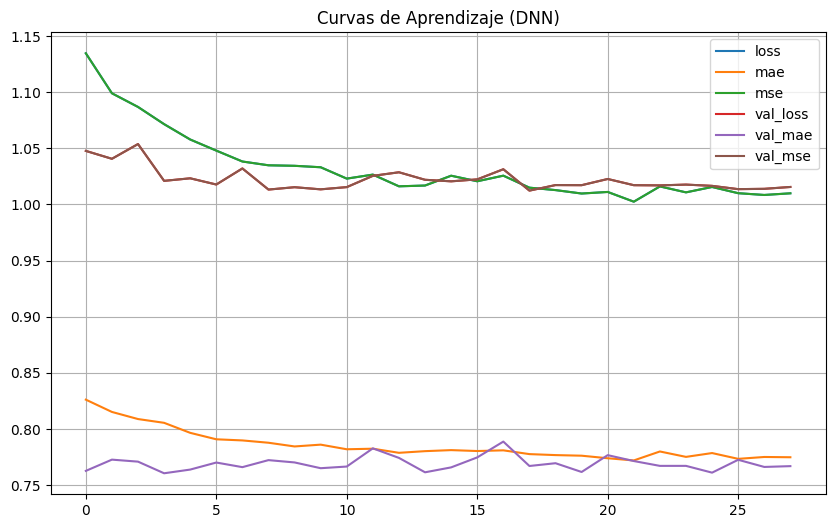

In [22]:
# Callback para detener el entrenamiento si la pérdida de validación no mejora
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,       # Esperar 10 épocas antes de parar
    restore_best_weights=True # Restaurar los pesos del mejor modelo
)

# Medir el tiempo de entrenamiento
start_time = time.time()

history = model_dnn_base.fit(
    X_train_clean, y_train_clean,
    epochs=100,       # Un número alto, EarlyStopping decidirá cuándo parar
    batch_size=32,
    validation_data=(X_val_clean, y_val_clean),
    callbacks=[early_stopping],
    verbose=1
)

end_time = time.time()
training_time_dnn = end_time - start_time

print(f"\n--- Entrenamiento DNN Finalizado ---")
print(f"Tiempo total de entrenamiento: {training_time_dnn:.2f} segundos")

# Plotear la historia para ver el aprendizaje
pd.DataFrame(history.history).plot(figsize=(10, 6))
plt.grid(True)
plt.title('Curvas de Aprendizaje (DNN)')
plt.show()